【問題1】べき乗の算術演算子を使用して作成
べき乗の算術演算子を使用したプログラムを作ってください。
雛形として紙を1回折った時の厚さを計算するコードを用意しました。これを43回折った時のコードに書き換えてください。

In [1]:
#紙を1回折った時の厚さを計算するコード
THICKNESS = 0.00008
thickness = THICKNESS
folded_thickness = thickness*(2**43)
print("厚さ： {}メートル".format(folded_thickness))

厚さ： 703687441.77664メートル


【問題2】単位の変換
単位がメートルだと実感が湧きづらいので◯◯万キロメートル に変換して表示させてください。サンプルとして ◯◯キロメートル に変換したコードを用意したので、参考にして取り組んでください。小数点以下は2桁まで表示されるようにも指定しています。

In [2]:
# メートルをキロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}キロメートル".format(folded_thickness/1000))

厚さ： 703687.44キロメートル


月までの距離:38.44万km　→　43回折れば到達する

【問題3】for文を使用して作成
次に、for文を使用したプログラムを作ってください。
べき乗の算術演算子は使ってはいけない。算術演算子は四則演算（+、-、*、/）のみ使える。
《ヒント》
べき乗は以下のように掛け算の繰り返しに置き換えることができます。
$2^3=2×2×2\
2^5=2×2×2×2×2$

In [3]:
thickness2 = THICKNESS
for i in range(43):
    thickness2*=2
print("厚さ： {:.2f}キロメートル".format(thickness2/1000))

厚さ： 703687.44キロメートル


【問題4】計算時間の比較
2つの方法はどちらが正しいわけでもありませんが、コードの良さを評価する際には以下のような着目点があります。
計算速度,メモリの使用量,可読性,拡張性,再利用性
今回は計算速度を比較してみます。以下の雛形を使用して、2つの方法の計算時間を出力してください。そして、それぞれの計算時間の関係を簡単に説明してください。どちらの書き方が良さそうでしょうか。なお、変数の定義やprint文など、どちらの方法でも使われている部分は除いた範囲の時間を比較してください。

In [4]:
import time

#べき乗を用いた場合
thickness3 = THICKNESS
start = time.time()

folded_thickness = thickness3*(2**1000)

elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

#for文を用いた場合

thickness4 = THICKNESS
start = time.time()

for i in range(1000):
    thickness4 *= 2

elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))

time : 3.504753112792969e-05[s]
time : 0.00012421607971191406[s]



計算速度を求めるには
1,import time  2,測りたい処理を　
start=time.time()  
と
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))
の間に記述する。


《発展：マジックコマンドを使う》
計算時間は実行するたびに変化します。そのため、複数回計測することが一般的です。timeモジュールとfor文を組み合わせることで実現できる他、Jupyter Notebookでは%timeitという マジックコマンド でも計測が可能です。マジックコマンドはPythonのプログラムとは別に用意された、Jupyter Notebookを便利にするための機能です。
Built-in magic commands — IPython 7.9.0 documentation
計測したいコードを書いたセルのはじめに%%timeitと入れて実行します。
※1000ns = 1µs

In [5]:
%%timeit
###
thickness5 = THICKNESS
folded_thickness = thickness5*(2**1000)
###

80.5 ns ± 1.72 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [6]:
%%timeit
###
thickness6 = THICKNESS
for i in range(1000):
    thickness6 *= 2
###

45.3 µs ± 966 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


【問題5】リストへの保存
ここまでは43回折った後の最後の値だけを使用していましたが、グラフで可視化するためには過程の値も必要です。for文を使用したコードに、過程の値合計44個を記録するコードを加えてください。
《ヒント》
空のリストを作成する。折る前の値をリストに追加する。
for文の中でn回折った時の値をリストに追加していく。
最終的にリストに44個の値が格納されていることをlen関数を用いて確認しておきましょう。

In [7]:
thickness7 = THICKNESS
lst = []
lst.append(thickness7)

for i in range(43):
    thickness7*=2
    lst.append(thickness7)
print("リスト内のデータ数： " + str(len(lst)))

リスト内のデータ数： 44


【問題6】折れ線グラフの表示
グラフの描画には Matplotlib という ライブラリ を用います。リストへ記録するコードの後ろで以下の雛形を使用してください

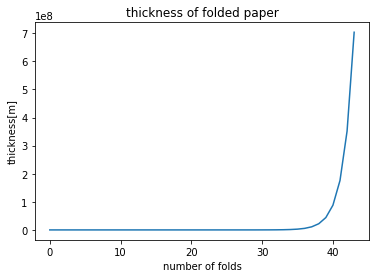

In [8]:
"""
グラフを表示する。タイトルと軸ラベル名付き。
"""
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(lst) # 「リスト名」のところにリストの変数名を入れる
plt.show()

【グラフの考察】
紙を折る回数が30回の中盤まではなだらかな変化だが、後半から急激に厚さが増加している。

【問題7】グラフのカスタマイズ
グラフをより見やすくカスタマイズしてみましょう。カスタマイズしたグラフを最低3種類作成してください。

1.色をオレンジに変更、フォントサイズの変更、mをkmに変更

In [1]:
thickness8 = THICKNESS
lst2 = []
lst2.append(thickness8/1000)

for i in range(43):
    thickness8*=2
    lst2.append(thickness8/1000)  #mをkmに変更
    
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[km]")  #mをkmに変更
plt.xlim([0,45])
plt.ylim([0,100000])
plt.rcParams["font.size"] = 10 #フォントサイズの変更
plt.plot(lst2,color="orange") #色をオレンジに変更
plt.show()

NameError: name 'THICKNESS' is not defined

2.グリッドを追加、グラフを太く

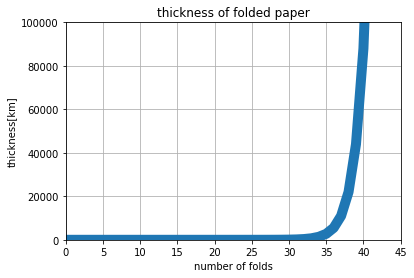

In [10]:
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[km]") 
plt.xlim([0,45])
plt.ylim([0,100000])
plt.rcParams["font.size"] = 10 
plt.plot(lst2,lw=10) #グラフを太く
plt.grid() #グリッドを追加
plt.show()

3.グラフを点線に変更、グラフの説明を追加

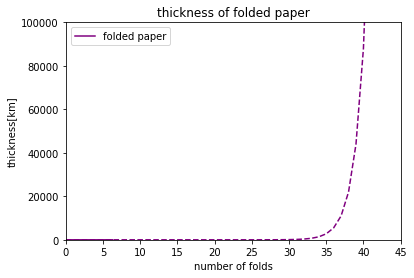

In [11]:
import numpy as np

x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[km]") 
plt.xlim([0,45])
plt.ylim([0,100000])
plt.rcParams["font.size"] = 10 
plt.plot(lst2,color="purple",linestyle="--")#グラフを点線に
plt.plot(x, y, label="folded paper",color="purple")#グラフの説明
plt.legend()#グラフの説明
plt.show()

In [1]:
%matplotlib inline
ax[0].title("thickness of folded paper")
ax[0].xlabel("number of folds")
ax[0].ylabel("thickness[m]")
ax[0].plot(lst) 

ax[1].title("thickness of folded paper")
ax[1].xlabel("number of folds")
ax[1].ylabel("thickness[km]") 
ax[1].xlim([0,45])
ax[1].ylim([0,100000])
ax[1].rcParams["font.size"] = 10 
ax[1].plot(lst2,lw=10) #グラフを太く
ax[1].grid() #グリッドを追加

x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
ax[2].title("thickness of folded paper")
ax[2].xlabel("number of folds")
ax[2].ylabel("thickness[km]") 
ax[2].xlim([0,45])
ax[2].ylim([0,100000])
ax[2].rcParams["font.size"] = 10 
ax[2].plot(lst2,color="purple",linestyle="--")#グラフを点線に
ax[2].plot(x, y, label="folded paper",color="purple")#グラフの説明
plt.legend()#グラフの説明

NameError: name 'ax' is not defined